**Polynomial Regression**

It is a type of regression that fits a curved line to the data, used when the relationship between input and output is not straight (non-linear regrssion).


**when use**

| Condition                       | Use This                       |
| ------------------------------- | ------------------------------ |
| Input-output relation is linear | Multiple Linear Regression     |
| Input-output relation is curved | Polynomial / Non-linear Models |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('salary.csv')
df.head(3)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000


In [3]:
df.corr()

,Level,Salary
Level,1.00000,0.72064
Salary,0.72064,1.00000


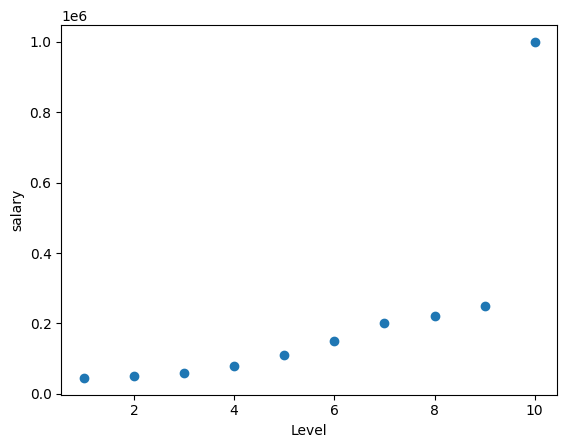

In [4]:
plt.scatter(df['Level '],df['Salary'])
plt.xlabel("Level")
plt.ylabel('salary')
plt.show()

This graph does not follow a straight line(linear regression), so we use polynomial regression to fit the curved pattern.

now we will convert dataset into polynomial

In [5]:
df.columns

Index(['Level ', 'Salary'], dtype='object')

In [6]:
df.columns = df.columns.str.strip()  # Removes extra spaces

In [7]:
x=df[['Level']] #input data must be 2D[[]]
# or 
# x=df.iloc[:,0] 
y=df['Salary']  

In [8]:
from sklearn.preprocessing import  PolynomialFeatures

In [10]:
pf=PolynomialFeatures(degree=3) # You can choose degree = 2, 3, 4, etc 
x=pf.fit_transform(x) #modules ko train hona ka bath again input me put kerdo 

**note:“Try using different degrees because the score may get better.”**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
lr.score(x_test,y_test)*100
# note:when I enter degree 2and4 so score is negative 

59.20786945500228

In [ ]:
# preduction of input 
prd=lr.predict(x)

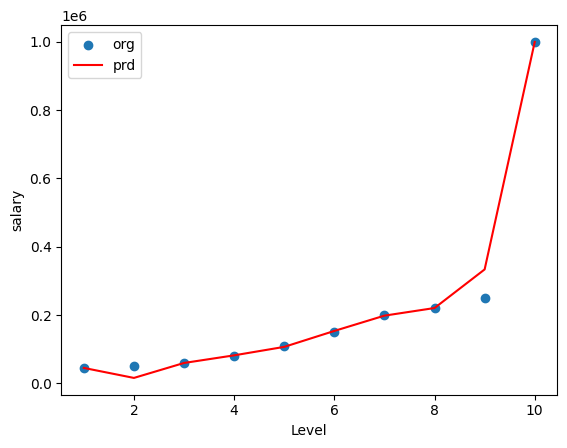

In [23]:
plt.scatter(df['Level'],df['Salary'])
plt.plot(df['Level'],prd,c='red') #**#
plt.xlabel('Level')
plt.ylabel('salary')
plt.legend(['org','prd'])
plt.show()